In [1]:
# Importing important libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing Dataset
company_data = pd.read_csv('Company_Data.csv')
company_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
company_data.shape

(400, 11)

In [4]:
company_data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [5]:
company_data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [7]:
company_data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [9]:
company_data.ShelveLoc.unique

<bound method Series.unique of 0         Bad
1        Good
2      Medium
3      Medium
4         Bad
        ...  
395      Good
396    Medium
397    Medium
398       Bad
399      Good
Name: ShelveLoc, Length: 400, dtype: object>

In [11]:
import numpy as np
company_data.Sales.mean()

7.496325

In [13]:
### 7.49 as target

{'whiskers': [<matplotlib.lines.Line2D at 0x116973d90>,
 'caps': [<matplotlib.lines.Line2D at 0x11698a4c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x116973a30>],
 'medians': [<matplotlib.lines.Line2D at 0x11698ab80>],
 'fliers': [<matplotlib.lines.Line2D at 0x11698aee0>],
 'means': []}

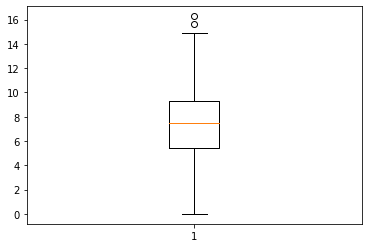

In [14]:
plt.boxplot(company_data["Sales"])

From the above boxplot we can see the outliers present in the given data set

In [15]:
company_data["sales"]="<-7.5"
company_data.loc[company_data["Sales"]<=7.5,"sales"]="Low Sales"
company_data.loc[company_data["Sales"]>=7.5,"sales"]="High Sales"

In [16]:
company_data=company_data.drop(["Sales"],axis=1)

In [17]:
colnames=list(company_data.columns)

In [41]:
#Label Encoding
le=LabelEncoder()
select_columns=["ShelveLoc","Urban","Urban","US","sales"]
le.fit(company_data[select_columns].values.flatten())
company_data[select_columns]=company_data[select_columns].apply(le.fit_transform)

In [42]:
company_data

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,138,73,11,276,120,0,42,17,1,1,0
1,111,48,16,260,83,1,65,10,1,1,0
2,113,35,10,269,80,2,59,12,1,1,0
3,117,100,4,466,97,2,55,14,1,1,1
4,141,64,3,340,128,0,38,13,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1,0
396,139,23,3,37,120,2,55,11,0,1,1
397,162,26,12,368,159,2,40,18,1,1,1
398,100,79,7,284,95,0,50,12,1,1,1


In [43]:
company_data.dtypes

CompPrice      int64
Income         int64
Advertising    int64
Population     int64
Price          int64
ShelveLoc      int64
Age            int64
Education      int64
Urban          int64
US             int64
sales          int64
dtype: object

In [44]:
X=company_data.drop('sales',axis=1)
y=company_data[['sales']]

In [46]:
#Split the data into training and testing
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,stratify = y) 
X_train.shape,y_train.shape

((280, 10), (280, 1))

In [47]:
X_test.shape,y_test.shape

((120, 10), (120, 1))

In [48]:
rf_cl = RandomForestClassifier()
rf_cl.fit(X_train,y_train)

<ipython-input-48-40c8dc3f1e3a>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_cl.fit(X_train,y_train)


RandomForestClassifier()

In [50]:
y_pred_train =rf_cl.predict(X_train)
y_pred_train

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

In [51]:
y_pred_test = rf_cl.predict(X_test)
y_pred_test

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0], dtype=int64)

In [52]:
accuracy_score(y_train,y_pred_train)

1.0

In [53]:
accuracy_score(y_test,y_pred_test)

0.8083333333333333

In [55]:
precision_score(y_test,y_pred_test)

0.8135593220338984

In [56]:
recall_score(y_test,y_pred_test)

0.8

In [57]:
confusion_matrix(y_test,y_pred_test)

array([[49, 11],
       [12, 48]], dtype=int64)

#### Insight:
* The accuracy score of training data is 1.00=100%
* The accuracy score of testing data is 0.8083 =80.83%
* The precision score of testing data is 0.8135=81.35%
* The recall score of testing data is 0.8 =80%
* From the confusion matrix we observed that there are 49+48 are correct predictions and 12+11 are incorrect predictions.

### To find the attributes causing higher sales

In [58]:
imp_feature = rf_cl.feature_importances_

In [59]:
X_train.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [62]:
feature_importance = pd.DataFrame({'Features':X_train.columns,'important Features':imp_feature})
feature_importance

,Features,important Features
0,CompPrice,0.117310
1,Income,0.103128
2,Advertising,0.120879
3,Population,0.096938
4,Price,0.249863
5,ShelveLoc,0.091974
6,Age,0.141428
7,Education,0.051470
8,Urban,0.013753
9,US,0.013257


In [64]:
## Sorting the important features in descending order
imp_features = feature_importance.sort_values(by='important Features',axis=0,ascending=False)
imp_features

,Features,important Features
4,Price,0.249863
6,Age,0.141428
2,Advertising,0.120879
0,CompPrice,0.117310
1,Income,0.103128
3,Population,0.096938
5,ShelveLoc,0.091974
7,Education,0.051470
8,Urban,0.013753
9,US,0.013257


Text(0.5, 1.0, 'Feature Importance')

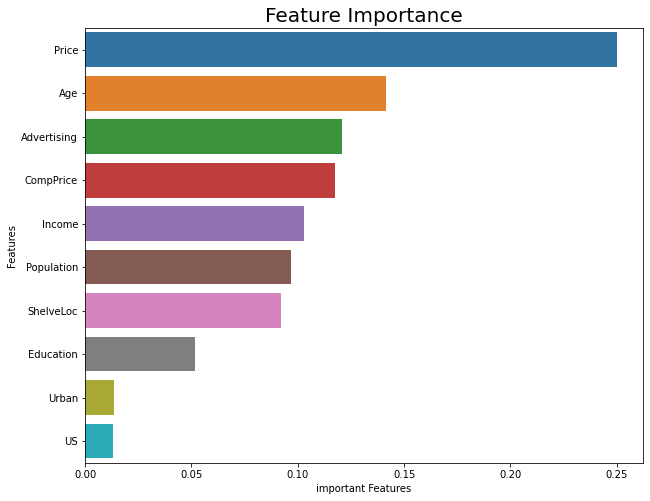

In [66]:
#Visualizing the important features
plt.figure(figsize=(10,8))
sns.barplot(x='important Features',y='Features',data=imp_features)
plt.title('Feature Importance',size=20)

#### Conclusion:
* From above table we can see Price,CompPrice,Advertising,Age and ShelveLoc are top 5 important features which are
  affecting the sales the most. This means this attributes will be responsible for higher sales as well.
* From the top 5 important features, 'Price' is affecting sales to larger extent. Hence,we cansay it is causing the high 
  sales.